In [42]:
import pandas as pd

data = pd.read_csv("city_day.csv")
data.head()



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [43]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [45]:
data.dropna(axis=0, inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


In [47]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


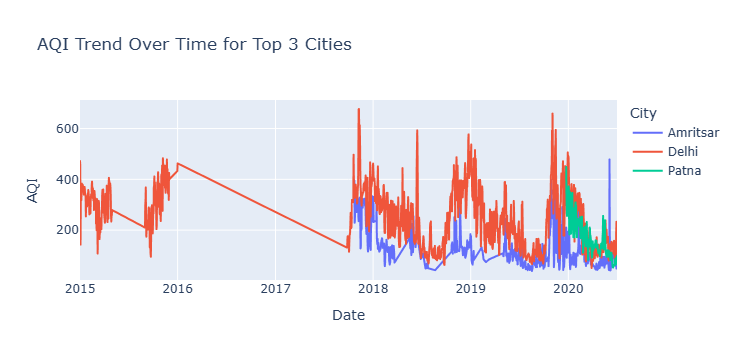

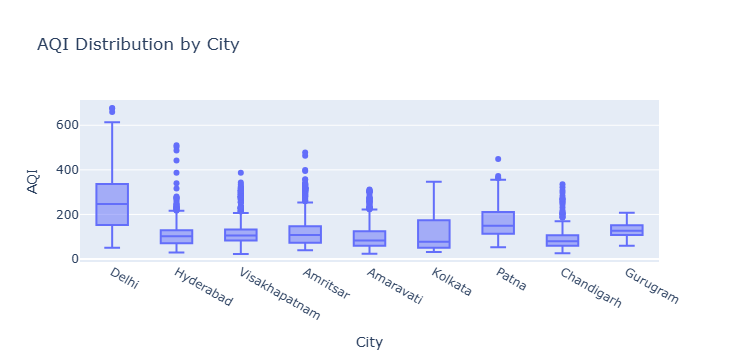

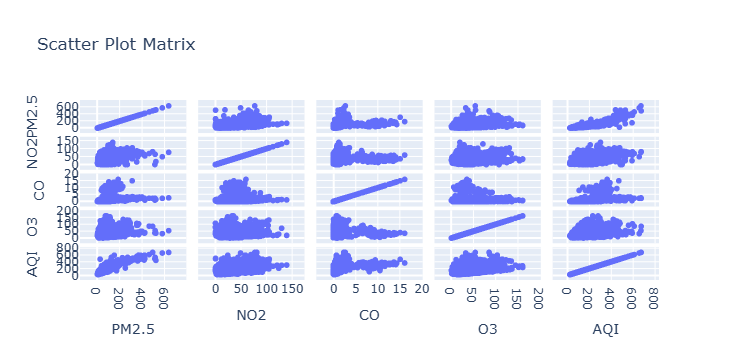

In [48]:
import plotly.express as px
import warnings

data['Date'] = pd.to_datetime(data['Date'])

warnings.filterwarnings("ignore", category=FutureWarning, module="plotly")


top_cities = data.groupby('City')['AQI'].mean().nlargest(3).index

# Filter the dataset to include only the top 5 cities
filtered_data = data[data['City'].isin(top_cities)]

# Create the line plot for the top 5 cities
fig1 = px.line(filtered_data, x='Date', y='AQI', color='City', title='AQI Trend Over Time for Top 3 Cities')

# Show the plot
fig1.show()

# Box plot for AQI distribution by City
fig2 = px.box(data, x='City', y='AQI', title='AQI Distribution by City')
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

# Scatter plot matrix for selected features
selected_features = ['PM2.5', 'NO2', 'CO', 'O3', 'AQI']
fig3 = px.scatter_matrix(data[selected_features], title='Scatter Plot Matrix')
fig3.show()

In [49]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

In [51]:
# Splitting the dataset into features (X) and target (y)
X = data[feature_columns]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Attention, MultiHeadAttention, Flatten
from tensorflow.keras.layers import Dropout, Dense, LSTM, Bidirectional, Attention, SimpleRNN, GRU
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [54]:
# prepare data for lstm
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
     Frame a time series as a supervised learning dataset.
     Arguments:
     data: Sequence of observations as a list or NumPy array.
     n_in: Number of lag observations as input (X).
     n_out: Number of observations as output (y).
     dropnan: Boolean whether or not to drop rows with NaN values.
     Returns:
     Pandas DataFrame of series framed for supervised learning.
     """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [55]:
#Remove outliers from the data set
#not standard approach
print('Before: Outliers Treating with IQR', data.shape)
df_outlier = data.copy()
# df_outlier.drop(['PM10'], axis=1, inplace=True)
df_outlier  = df_outlier.select_dtypes(exclude ='object')
#1st quantile
q1 = df_outlier.quantile(0.25)

#3rd quantile
q3 = df_outlier.quantile(0.75)

# IQR: The Interquartile Range is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
iqr = q3-q1
# print(IQR)
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_outlier = df_outlier[~((df_outlier  < (q1-(1.5*iqr))) | (df_outlier  > (q3+(1.5*iqr)))).any(axis=1)]

# check the shape of the data
print('After: Outliers Treating with IQR', df_outlier.shape)

Before: Outliers Treating with IQR (6236, 16)
After: Outliers Treating with IQR (4134, 14)


In [56]:
import matplotlib.pyplot as plt

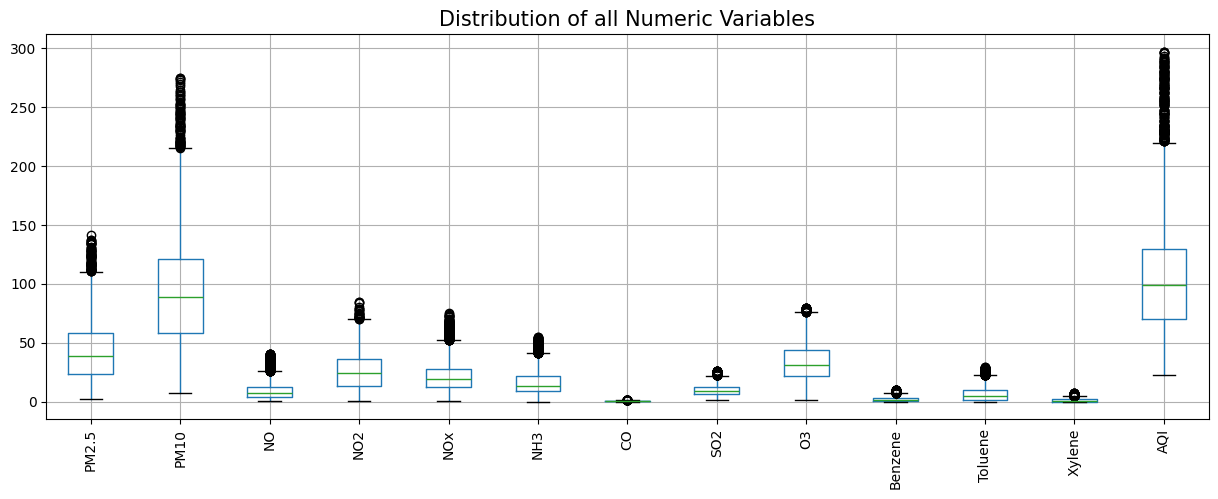

In [57]:
df_outlier = df_outlier.select_dtypes(exclude='object').copy()
# df_outlier.drop('PM10', inplace=True, axis=1)
# set the plot size using figure()
# pass width and height in inches to 'figsize'
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
df_outlier.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()


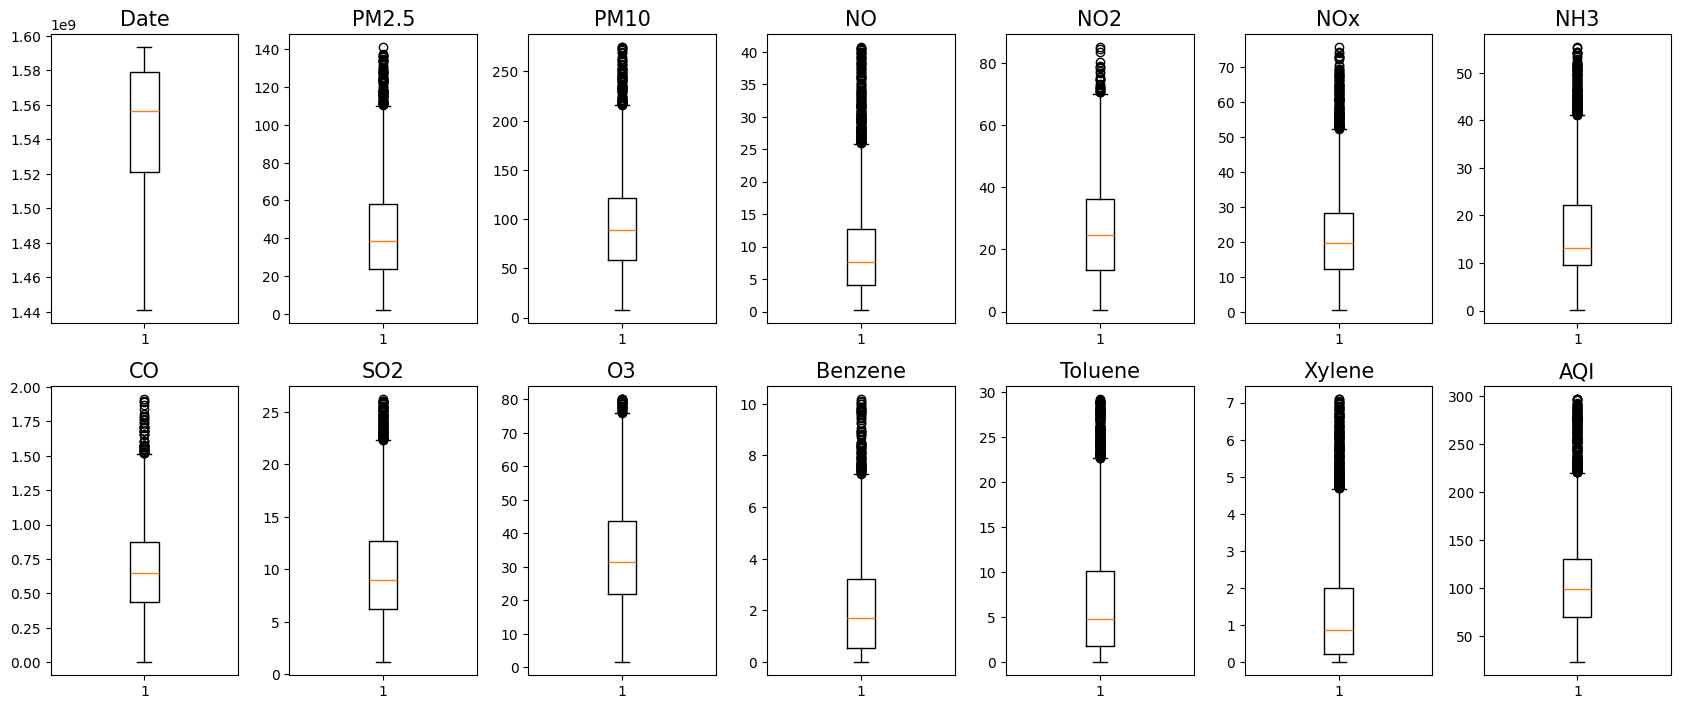

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataframe for demonstration (you can replace this with your actual df_outlier)
# df_outlier = pd.DataFrame(...)

# Assuming df_outlier is already defined
df_out = df_outlier.copy()
outliers_by_variables = df_out.columns

# Set figure size and DPI
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(17, 14))

for i in range(outliers_by_variables.shape[0]):
    plt.subplot(4, 7, i + 1)
    col = outliers_by_variables[i]

    # Check if the column is datetime and convert it to numerical values if it is
    if pd.api.types.is_datetime64_any_dtype(df_out[col]):
        data = df_out[col].apply(lambda x: x.timestamp())
    else:
        data = df_out[col]

    # Plot boxplot
    plt.boxplot(data, autorange=True)
    plt.title(col, fontdict={'fontsize': 15, 'fontweight': 5, 'color': '000000'})

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataframe for demonstration (you can replace this with your actual df_outlier)
# df_outlier = pd.DataFrame(...)

# Assuming df_outlier is already defined
df_out = df_outlier.copy()

# Convert datetime columns to numerical values (e.g., timestamps)
for col in df_out.columns:
    if pd.api.types.is_datetime64_any_dtype(df_out[col]):
        df_out[col] = df_out[col].apply(lambda x: x.timestamp())

# Extract values and convert to float32
values = df_out.values
values = values.astype('float32')

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

# Function to frame the data as supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Frame as supervised learning
reframed = series_to_supervised(scaled, 3, 1)

print(reframed)


      var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3      0.470255   0.519216   0.499925   0.144623   0.526154   0.376916   
4      0.470821   0.347101   0.355853   0.036588   0.394556   0.250700   
5      0.471388   0.405646   0.402690   0.115698   0.486746   0.340530   
6      0.471954   0.627469   0.463429   0.190853   0.492189   0.376916   
7      0.472521   0.448387   0.344499   0.171817   0.405562   0.316673   
...         ...        ...        ...        ...        ...        ...   
4129   0.995467   0.168091   0.283198   0.062052   0.397396   0.257497   
4130   0.996034   0.232455   0.311376   0.023980   0.270651   0.166867   
4131   0.996600   0.082250   0.190123   0.050680   0.249586   0.166467   
4132   0.997167   0.040442   0.091689   0.139926   0.269349   0.221112   
4133   0.997734   0.093528   0.161646   0.183684   0.290533   0.252432   

      var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  ...   var5(t)   var6(t)  \
3      0.282483   0.047120   0.82

In [60]:
values = reframed.values
number=len(values)
n_train_hours = int(number*0.7)
n_valid_hours = int(number*0.9)
train = values[:n_train_hours, :]
valid = values[n_train_hours:n_valid_hours, :]
test = values[n_valid_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-11], train[:, -11:-5]
valid_X, valid_y = valid[:, :-11], valid[:, -11:-5]
test_X, test_y = test[:, :-11], test[:, -11:-5]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape,
      test_y.shape)  # [samples, timesteps, features]

(2891, 1, 45) (2891, 6) (826, 1, 45) (826, 6) (414, 1, 45) (414, 6)


In [61]:
epochs = 100
batch_size = 32
learning_rate = 0.001

timesteps = train_X.shape[1]
input_dim = train_X.shape[2]
output_dim=6

In [62]:
from keras.layers import Input, Bidirectional, LSTM, MultiHeadAttention, Flatten, Dense
from keras.models import Model
import keras

# Assuming timesteps, input_dim, output_dim, learning_rate, epochs, batch_size, train_X, train_y, valid_X, valid_y are already defined

inputs = Input(shape=(timesteps, input_dim))

# Define LSTM layer and multi-head attention layer
lstm_out = Bidirectional(LSTM(units=128, activation='relu', return_sequences=True))(inputs)
multihead_attn = MultiHeadAttention(num_heads=4, key_dim=32)(lstm_out, lstm_out)

# Define fully connected layer and output layer
flatten = Flatten()(multihead_attn)
dense = Dense(units=128, activation='relu')(flatten)
output = Dense(units=output_dim, activation='relu')(dense)

# Define model and compile
BiLSTMultiheadAtt = Model(inputs=inputs, outputs=output)
BiLSTMultiheadAtt.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

# plot_model(model, to_file="Bi-LSTM-MultiheadAtt.png", dpi=300, show_shapes=True)

path_checkpoint = "model_checkpoint_MultiAttLSTM_aqiPre.weights.h5"  # Changed file extension to .weights.h5

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=0,
    save_weights_only=True,
    save_best_only=True,
)

# Fit network
history = BiLSTMultiheadAtt.fit(
    train_X, train_y,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(valid_X, valid_y)
    # ,
    # callbacks=[es_callback, modelckpt_callback]  # Include the es_callback
)

# Assuming visualize_loss and visualize_acc functions are defined
# visualize_loss(history, "Training and Validation Loss")
# visualize_acc(history, "Training and Validation Accuracy")



Epoch 1/100
91/91 [==============================] - 4s 11ms/step - loss: 0.0466 - accuracy: 0.3656 - val_loss: 0.0250 - val_accuracy: 0.4746
Epoch 2/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0355 - accuracy: 0.5514 - val_loss: 0.0243 - val_accuracy: 0.3801
Epoch 3/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0347 - accuracy: 0.5545 - val_loss: 0.0230 - val_accuracy: 0.5242
Epoch 4/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0342 - accuracy: 0.5839 - val_loss: 0.0232 - val_accuracy: 0.5278
Epoch 5/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0337 - accuracy: 0.5777 - val_loss: 0.0225 - val_accuracy: 0.4964
Epoch 6/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0338 - accuracy: 0.5842 - val_loss: 0.0235 - val_accuracy: 0.5569
Epoch 7/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0334 - accuracy: 0.5822 - val_loss: 0.0224 - val_accuracy: 0.5036
Epoch 8/100


Epoch 1/100
91/91 [==============================] - 1s 8ms/step - loss: 0.0037 - accuracy: 0.7897 - val_loss: 0.0167 - val_accuracy: 0.5218
Epoch 2/100
91/91 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.7900 - val_loss: 0.0157 - val_accuracy: 0.5351
Epoch 3/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0033 - accuracy: 0.8049 - val_loss: 0.0161 - val_accuracy: 0.5327
Epoch 4/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0033 - accuracy: 0.8046 - val_loss: 0.0163 - val_accuracy: 0.4976
Epoch 5/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 0.8021 - val_loss: 0.0158 - val_accuracy: 0.5254
Epoch 6/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0034 - accuracy: 0.7949 - val_loss: 0.0167 - val_accuracy: 0.4976
Epoch 7/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0034 - accuracy: 0.8025 - val_loss: 0.0169 - val_accuracy: 0.5303
Epoch 8/100
9

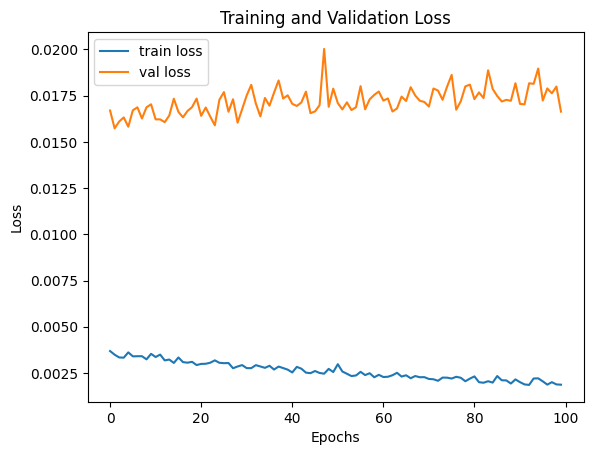

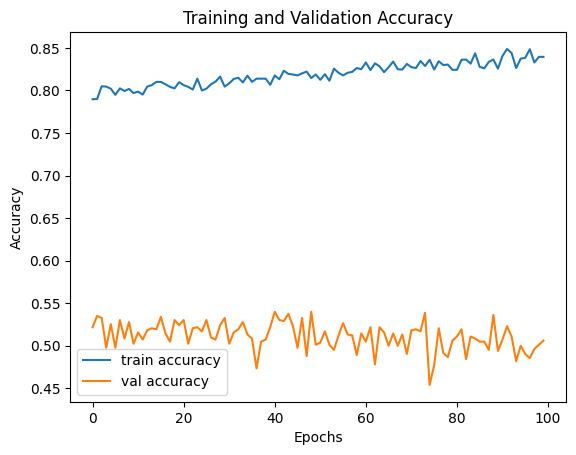

In [63]:
import matplotlib.pyplot as plt

# Assuming you have history object from model fitting
history = BiLSTMultiheadAtt.fit(
    train_X, train_y,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(valid_X, valid_y),
    callbacks=[modelckpt_callback]
)

def visualize_loss(history, title):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def visualize_acc(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Generate the graphs
visualize_loss(history, "Training and Validation Loss")
visualize_acc(history, "Training and Validation Accuracy")


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/100
91/91 [==============================] - 2s 7ms/step - loss: 0.0239 - accuracy: 0.4967 - val_loss: 0.0160 - val_accuracy: 0.4903
Epoch 2/100
91/91 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.6921 - val_loss: 0.0146 - val_accuracy: 0.4927
Epoch 3/100
91/91 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.7084 - val_loss: 0.0147 - val_accuracy: 0.5230
Epoch 4/100
91/91 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.7132 - val_loss: 0.0130 - val_accuracy: 0.5157
Epoch 5/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.7219 - val_loss: 0.0127 - val_accuracy: 0.5460
Epoch 6/100
91/91 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.7299 - val_loss: 0.0130 - val_accuracy: 0.5254
Epoch

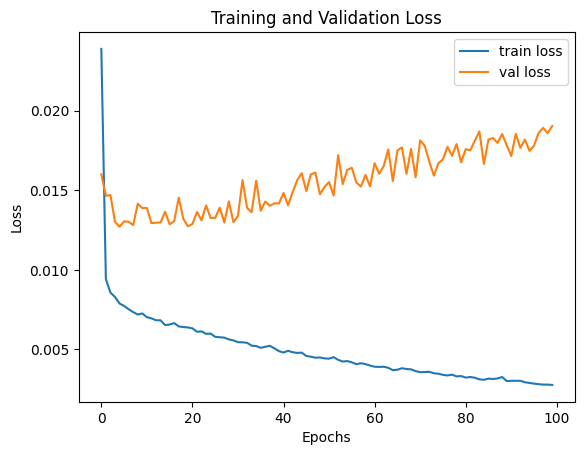

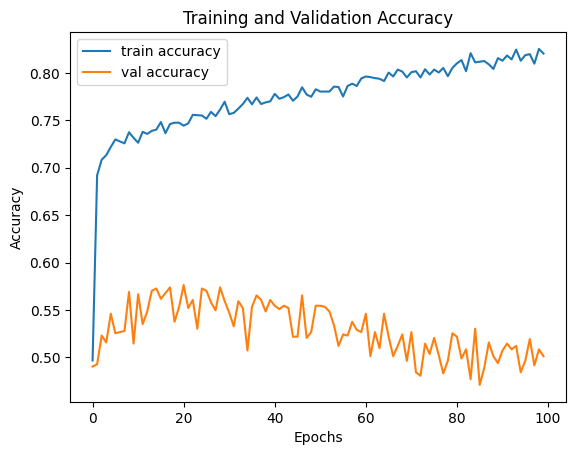

In [64]:
from keras.layers import Input, SimpleRNN, Dense
from keras.models import Model
import keras
import matplotlib.pyplot as plt

# Assuming timesteps, input_dim, output_dim, learning_rate, epochs, batch_size, train_X, train_y, valid_X, valid_y are already defined

inputs = Input(shape=(timesteps, input_dim))

# Define SimpleRNN layer
rnn_out = SimpleRNN(128, activation='relu', return_sequences=False)(inputs)

# Define fully connected layer and output layer
dense = Dense(units=128, activation='relu')(rnn_out)
output = Dense(units=output_dim, activation='relu')(dense)

# Define model and compile
rnn = Model(inputs=inputs, outputs=output)
rnn.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Plot the model
from keras.utils import plot_model
plot_model(rnn, to_file="SimpleRNN.png", dpi=300, show_shapes=True)

path_checkpoint = "model_checkpoint_SimpleRNN_aqiPre.weights.h5"

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=0,
    save_weights_only=True,
    save_best_only=True,
)

# Fit network with checkpoint callback
history = rnn.fit(
    train_X, train_y,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(valid_X, valid_y),
    callbacks=[modelckpt_callback]
)

# Function to visualize loss
def visualize_loss(history, title):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to visualize accuracy
def visualize_acc(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Generate the graphs
visualize_loss(history, "Training and Validation Loss")
visualize_acc(history, "Training and Validation Accuracy")


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/100
91/91 [==============================] - 2s 8ms/step - loss: 0.0311 - accuracy: 0.3992 - val_loss: 0.0191 - val_accuracy: 0.4116
Epoch 2/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.6807 - val_loss: 0.0144 - val_accuracy: 0.5121
Epoch 3/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.7043 - val_loss: 0.0130 - val_accuracy: 0.5460
Epoch 4/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0083 - accuracy: 0.7209 - val_loss: 0.0124 - val_accuracy: 0.5218
Epoch 5/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.7233 - val_loss: 0.0126 - val_accuracy: 0.5496
Epoch 6/100
91/91 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.7267 - val_loss: 0.0125 - val_accuracy: 0.5617
Epoch

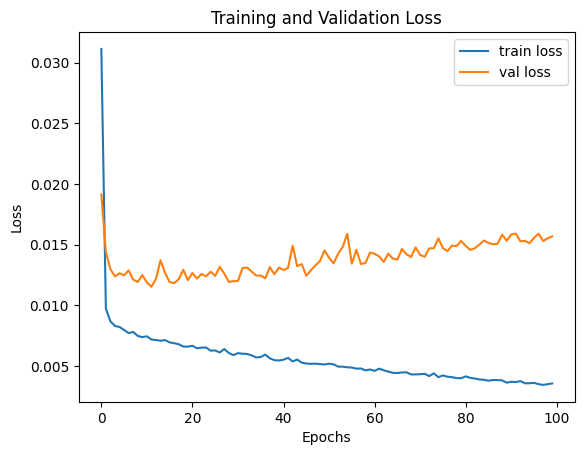

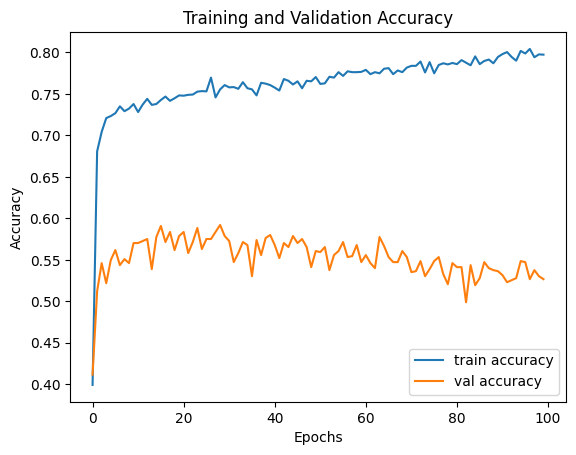

In [65]:
from keras.layers import Input, GRU, Dense
from keras.models import Model
import keras
import matplotlib.pyplot as plt

# Assuming timesteps, input_dim, output_dim, learning_rate, epochs, batch_size, train_X, train_y, valid_X, valid_y are already defined

inputs = Input(shape=(timesteps, input_dim))

# Define GRU layer
gru_out = GRU(128, activation='relu', return_sequences=False)(inputs)

# Define fully connected layer and output layer
dense = Dense(units=128, activation='relu')(gru_out)
output = Dense(units=output_dim, activation='relu')(dense)

# Define model and compile
gru = Model(inputs=inputs, outputs=output)
gru.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Plot the model
from keras.utils import plot_model
plot_model(gru, to_file="GRU.png", dpi=300, show_shapes=True)

path_checkpoint = "model_checkpoint_GRU_aqiPre.weights.h5"

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=0,
    save_weights_only=True,
    save_best_only=True,
)

# Fit network with checkpoint callback
history = gru.fit(
    train_X, train_y,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(valid_X, valid_y),
    callbacks=[modelckpt_callback]
)

# Function to visualize loss
def visualize_loss(history, title):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to visualize accuracy
def visualize_acc(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Generate the graphs
visualize_loss(history, "Training and Validation Loss")
visualize_acc(history, "Training and Validation Accuracy")


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/100
91/91 [==============================] - 2s 8ms/step - loss: 0.0402 - accuracy: 0.4248 - val_loss: 0.0425 - val_accuracy: 0.3402
Epoch 2/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0247 - accuracy: 0.5507 - val_loss: 0.0170 - val_accuracy: 0.3584
Epoch 3/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0101 - accuracy: 0.6347 - val_loss: 0.0145 - val_accuracy: 0.4758
Epoch 4/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0089 - accuracy: 0.6949 - val_loss: 0.0133 - val_accuracy: 0.4564
Epoch 5/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0085 - accuracy: 0.7122 - val_loss: 0.0141 - val_accuracy: 0.5448
Epoch 6/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.7115 - val_loss: 0.0135 - val_accuracy: 0.5073
Epoch

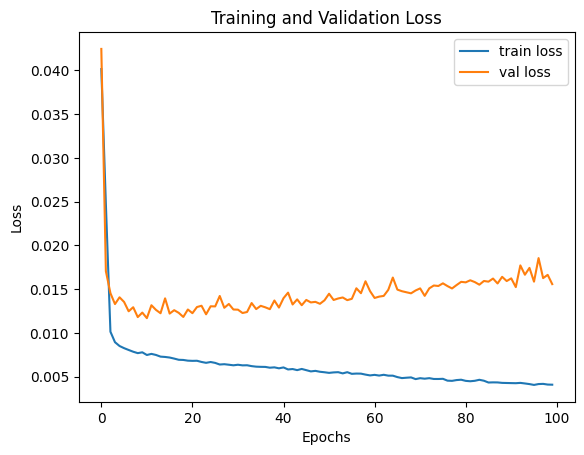

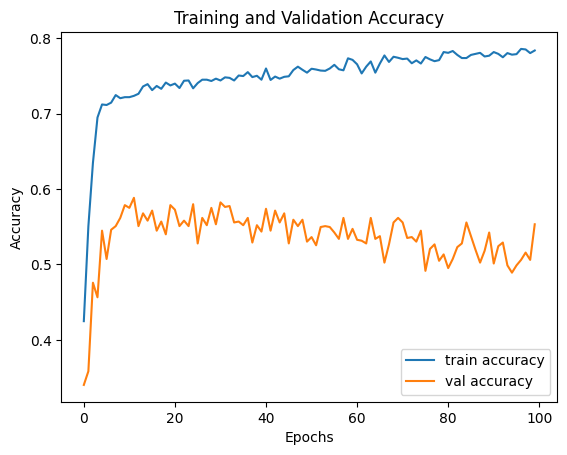

Validation Loss: 0.015567122958600521
Validation Accuracy: 0.5532687902450562


In [66]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model
import keras
import matplotlib.pyplot as plt

# Assuming timesteps, input_dim, output_dim, learning_rate, epochs, batch_size, train_X, train_y, valid_X, valid_y are already defined

inputs = Input(shape=(timesteps, input_dim))

# Define LSTM layer
lstm_out = LSTM(128, activation='relu', return_sequences=False)(inputs)

# Define fully connected layer and output layer
dense = Dense(units=128, activation='relu')(lstm_out)
output = Dense(units=output_dim, activation='relu')(dense)

# Define model and compile
lstm = Model(inputs=inputs, outputs=output)
lstm.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
             metrics=['accuracy'])

# Plot the model
from keras.utils import plot_model
plot_model(lstm, to_file="LSTM.png", dpi=300, show_shapes=True)

path_checkpoint = "model_checkpoint_LSTM_aqiPre.weights.h5"

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=0,
    save_weights_only=True,
    save_best_only=True,
)

# Fit network with checkpoint callback
history = lstm.fit(
    train_X, train_y,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(valid_X, valid_y),
    callbacks=[modelckpt_callback]
)

# Function to visualize loss
def visualize_loss(history, title):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to visualize accuracy
def visualize_acc(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Generate the graphs
visualize_loss(history, "Training and Validation Loss")
visualize_acc(history, "Training and Validation Accuracy")

# Evaluate the model
evaluation = lstm.evaluate(valid_X, valid_y, verbose=0)
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")
